In [1]:
import importlib

import numpy as np
import pandas as pd
import joblib
import mne
from math import *

import matplotlib.pyplot as plt

import generisAPI
importlib.reload(generisAPI)

import generisAPI.plots as plots
importlib.reload(generisAPI.plots)

import generisAPI.featuresExtraction as featuresMethods
importlib.reload(generisAPI.featuresExtraction)

<module 'generisAPI.featuresExtraction' from '/media/emmanuel/DATA/Emmanuel_petron_Olateju/github/ubuntu/MMN_SZ/notebooks/generisAPI/featuresExtraction.py'>

In [2]:
electrodes=[
    'Fp1','Fp2','F3','F4','C3',
    'C4','P3','P4','O1','O2',
    'F7','F8','T3','T4','T5',
    'T6','FZ','PZ','CZ',
    ]

In [3]:
features = joblib.load('../features/MMN_hubFuzzyEntropy.sav')

#### MMN montage plots

In [4]:
y = features['category']
X_entropies = features.iloc[:,2:-1]
mmn_feature_method_100ms = featuresMethods.MMN(19,19,19)
mmn_feature_method_200ms= featuresMethods.MMN(19,38,19)
mmn_feature_method_300ms = featuresMethods.MMN(19,57,19)
mmn_feature_method_400ms = featuresMethods.MMN(19,66,19)
mmn_feature_method_500ms = featuresMethods.MMN(19,85,19)
oneKdeviant = list()
threeKdeviant = list()
for subject in features.index:
    oneKdeviant.append([
        mmn_feature_method_100ms.mmn_value(features.loc[subject,'MMN_1KHz']),
        mmn_feature_method_200ms.mmn_value(features.loc[subject,'MMN_1KHz']),
        mmn_feature_method_300ms.mmn_value(features.loc[subject,'MMN_1KHz']),
        mmn_feature_method_400ms.mmn_value(features.loc[subject,'MMN_1KHz']),
        mmn_feature_method_500ms.mmn_value(features.loc[subject,'MMN_1KHz']),
        ])
    threeKdeviant.append([
        mmn_feature_method_100ms.mmn_value(features.loc[subject,'MMN_3KHz']),
        mmn_feature_method_200ms.mmn_value(features.loc[subject,'MMN_3KHz']),
        mmn_feature_method_300ms.mmn_value(features.loc[subject,'MMN_3KHz']),
        mmn_feature_method_400ms.mmn_value(features.loc[subject,'MMN_3KHz']),
        mmn_feature_method_500ms.mmn_value(features.loc[subject,'MMN_3KHz']),
        ])
X_mmn_1k = np.array(oneKdeviant)
X_mmn_3k = np.array(threeKdeviant)

del oneKdeviant,threeKdeviant

In [5]:
patientsIndex = np.argwhere(np.array(features['category'] == 'Patient')==True).flatten()
controlsIndex = np.argwhere(np.array(features['category'] == 'Control')==True).flatten()

In [13]:
%%capture
plt.ioff()
fig,ax = plt.subplots(len(patientsIndex),5,figsize=(24,43))
fig.suptitle('1000KHz duration deviant MMN montage for SZ patients',fontsize=20)
for si,s in enumerate(patientsIndex):
    for c in range(5):
        plots.montage_plot(X_mmn_1k[s,c,:],electrodes,ax[si,c])
        ax[si,c].set_aspect('auto')
        if c==0:
            ax[si,c].set_ylabel('Subject ' + str(features.index[s]))
        ax[si,0].set_xlabel('0-100ms')
        ax[si,1].set_xlabel('100-200ms')
        ax[si,2].set_xlabel('200-300ms')
        ax[si,3].set_xlabel('300-400ms')
        ax[si,4].set_xlabel('400-450ms')
fig.tight_layout()
fig.subplots_adjust(top=0.97)
plt.savefig('../data_analysis_results/MMN/montage/Patient/1KHz_duration_deviant_montage'+'.png',format='png')
plt.close(fig)

In [14]:
%%capture
plt.ioff()
fig,ax = plt.subplots(len(patientsIndex),5,figsize=(24,43))
fig.suptitle('3000KHz frequency deviant MMN montage for SZ patients',fontsize=20)
for si,s in enumerate(patientsIndex):
    for c in range(5):
        plots.montage_plot(X_mmn_3k[s,c,:],electrodes,ax[si,c])
        ax[si,c].set_aspect('auto')
        if c==0:
            ax[si,c].set_ylabel('Subject ' + str(features.index[s]))
        ax[si,0].set_xlabel('0-100ms')
        ax[si,1].set_xlabel('100-200ms')
        ax[si,2].set_xlabel('200-300ms')
        ax[si,3].set_xlabel('300-400ms')
        ax[si,4].set_xlabel('400-450ms')
fig.tight_layout()
fig.subplots_adjust(top=0.97)
plt.savefig('../data_analysis_results/MMN/montage/Patient/3KHz_frequency_deviant_montage'+'.png',format='png')
plt.close(fig)

In [15]:
%%capture
plt.ioff()
fig,ax = plt.subplots(len(controlsIndex),5,figsize=(24,57))
fig.suptitle('1000KHz duration deviant MMN montage for control subjects',fontsize=20)
for si,s in enumerate(controlsIndex):
    for c in range(5):
        plots.montage_plot(X_mmn_1k[s,c,:],electrodes,ax[si,c])
        ax[si,c].set_aspect('auto')
        if c==0:
            ax[si,c].set_ylabel('Subject ' + str(features.index[s]))
        ax[si,0].set_xlabel('0-100ms')
        ax[si,1].set_xlabel('100-200ms')
        ax[si,2].set_xlabel('200-300ms')
        ax[si,3].set_xlabel('300-400ms')
        ax[si,4].set_xlabel('400-450ms')
fig.tight_layout()
fig.subplots_adjust(top=0.97)
plt.savefig('../data_analysis_results/MMN/montage/Control/1KHz_duration_deviant_montage'+'.png',format='png')

In [16]:
%%capture
plt.ioff()
fig,ax = plt.subplots(len(controlsIndex),5,figsize=(24,57))
fig.suptitle('3000KHz frequency deviant MMN montage for control subjects',fontsize=20)
for si,s in enumerate(controlsIndex):
    for c in range(5):
        plots.montage_plot(X_mmn_3k[s,c,:],electrodes,ax[si,c])
        ax[si,c].set_aspect('auto')
        if c==0:
            ax[si,c].set_ylabel('Subject ' + str(features.index[s]))
        ax[si,0].set_xlabel('0-100ms')
        ax[si,1].set_xlabel('100-200ms')
        ax[si,2].set_xlabel('200-300ms')
        ax[si,3].set_xlabel('300-400ms')
        ax[si,4].set_xlabel('400-450ms')
fig.tight_layout()
fig.subplots_adjust(top=0.97)
plt.savefig('../data_analysis_results/MMN/montage/Control/3KHz_frequency_deviant_montage'+'.png',format='png')

#### fuzzyEntropy montage plots

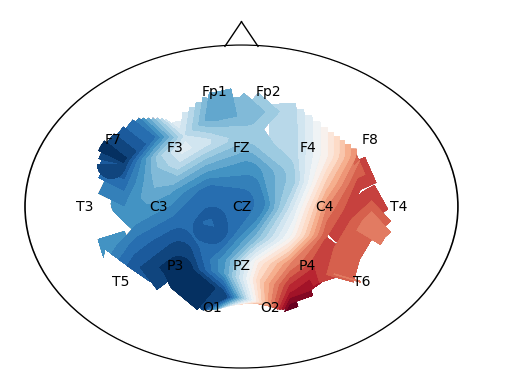

In [158]:
fig,ax = plt.subplots(1,1)
plots.montage_plot(X_mmn_1k[1,0,:],electrodes,ax)

In [95]:
np.mgrid[0:1:50j,0:1:50j].shape

(2, 50, 50)